<a href="https://colab.research.google.com/github/tgiangregorio/Medical_Genomics/blob/main/ROH.statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####***Runs of Homozygosity (ROH) from WES data: inbred vs outbred cohort***

##### ***Library Loading***

In [25]:
library(dplyr)
library(ggplot2)

##### ***Import results of ROH detection with Audacity***

In [28]:
AudacityROHResult<-read.delim("https://raw.githubusercontent.com/tgiangregorio/Medical_Genomics/main/AudacityROHresults.txt", sep="\t", header=TRUE, na.strings = "NA", stringsAsFactors = T)
head(AudacityROHResult)

,ID,Chrom,Start,End,Length,n_Hom_R,n_Hom_A,n_Het,Score,Status
,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<fct>
1,I01,chr2,27245011,27746394,501383,993,26,5,4.2251317,inbred
2,I01,chr2,96930843,97039158,108315,212,12,0,9.0521127,inbred
3,I01,chr10,96256984,97082649,825665,284,22,1,13.1372629,inbred
4,I01,chr2,95537245,96517570,980325,318,8,2,0.1589894,inbred
5,I01,chr16,70285001,70930069,645068,715,13,3,6.7389611,inbred
6,I01,chr2,220032814,220252583,219769,497,30,1,5.5739814,inbred


In [4]:
str(AudacityROHResult)

'data.frame':	4037 obs. of  10 variables:
 $ ID     : Factor w/ 20 levels "I01","I02","I03",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Chrom  : Factor w/ 22 levels "chr1","chr10",..: 12 12 2 12 8 12 3 3 16 2 ...
 $ Start  : int  27245011 96930843 96256984 95537245 70285001 220032814 71595703 7949192 4669380 81316888 ...
 $ End    : int  27746394 97039158 97082649 96517570 70930069 220252583 71850960 8246181 5257570 82403836 ...
 $ Length : int  501383 108315 825665 980325 645068 219769 255257 296989 588190 1086948 ...
 $ n_Hom_R: int  993 212 284 318 715 497 248 193 285 421 ...
 $ n_Hom_A: int  26 12 22 8 13 30 10 13 8 33 ...
 $ n_Het  : int  5 0 1 2 3 1 0 0 1 2 ...
 $ Score  : num  4.225 9.052 13.137 0.159 6.739 ...
 $ Status : Factor w/ 2 levels "consanguineous",..: 1 1 1 1 1 1 1 1 1 1 ...


##### ***Distributions of short and long ROH in inbred and outbread individuals***

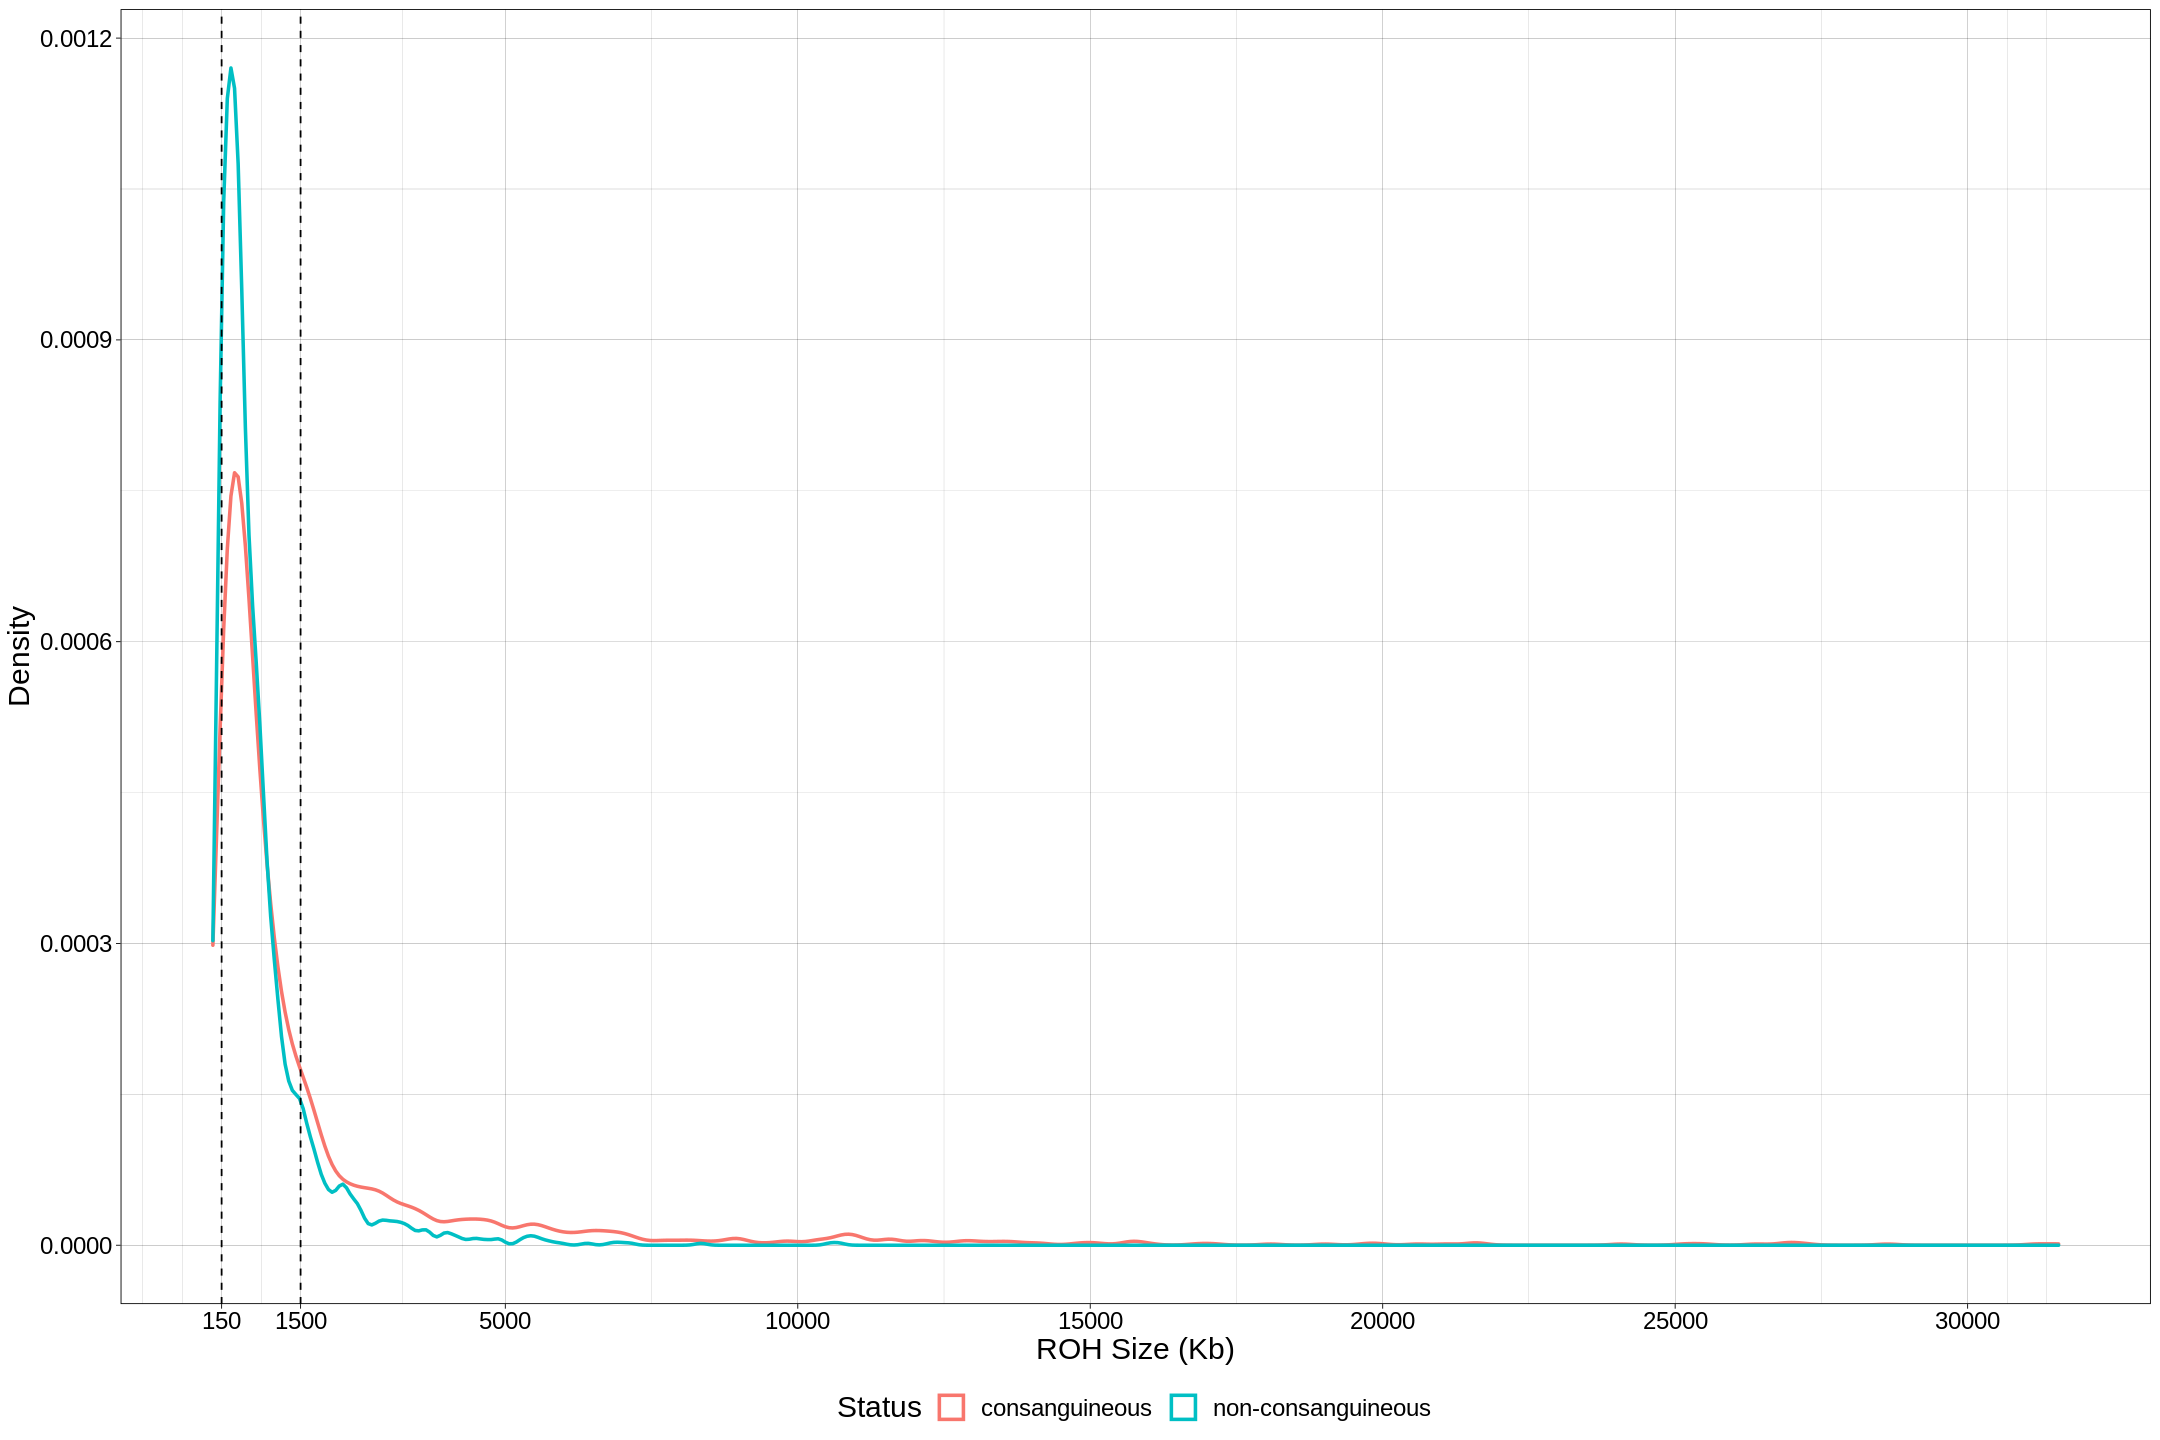

In [5]:
options(repr.plot.width=18, repr.plot.height=12)

ggplot(AudacityROHResult,aes(x =Length/1000, color=Status)) +
 geom_density(size=1) +
 xlab("ROH Size (Kb)") +
 ylab("Density") +
 geom_vline(aes(xintercept=150),color="black",linetype="dashed") +
 geom_vline(aes(xintercept=1500),color="black",linetype="dashed") +
 theme_linedraw() +
 theme(text=element_text(size=18,color = "black"),
       legend.position="bottom") +
 scale_x_continuous(breaks=c(150,1500,5000,10000,15000,20000,25000,30000,35000))

##### ***Distribution of ROH lengths over all individuals in each of the 2 cohorts (ROH class > 1.5Mb)***

In [17]:
###filter ROH > 1.5Mb
AudacityROHResult_1.5Mb<- AudacityROHResult %>% 
  filter(Length>1500000)

###calculate the median ROH size of each group
ROH1.5Mb_Summary<-AudacityROHResult_1.5Mb  %>%
group_by(Status) %>% 
summarize(median(Length),min(Length),max(Length),median(Score),min(Score),max(Score))

ROH1.5Mb_Summary

Status,median(Length),min(Length),max(Length),median(Score),min(Score),max(Score)
<fct>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
consanguineous,3218861,1500836,31555008,23.404780,0,430.5792
non-consanguineous,2226497,1507462,10711932,4.808061,0,134.2398


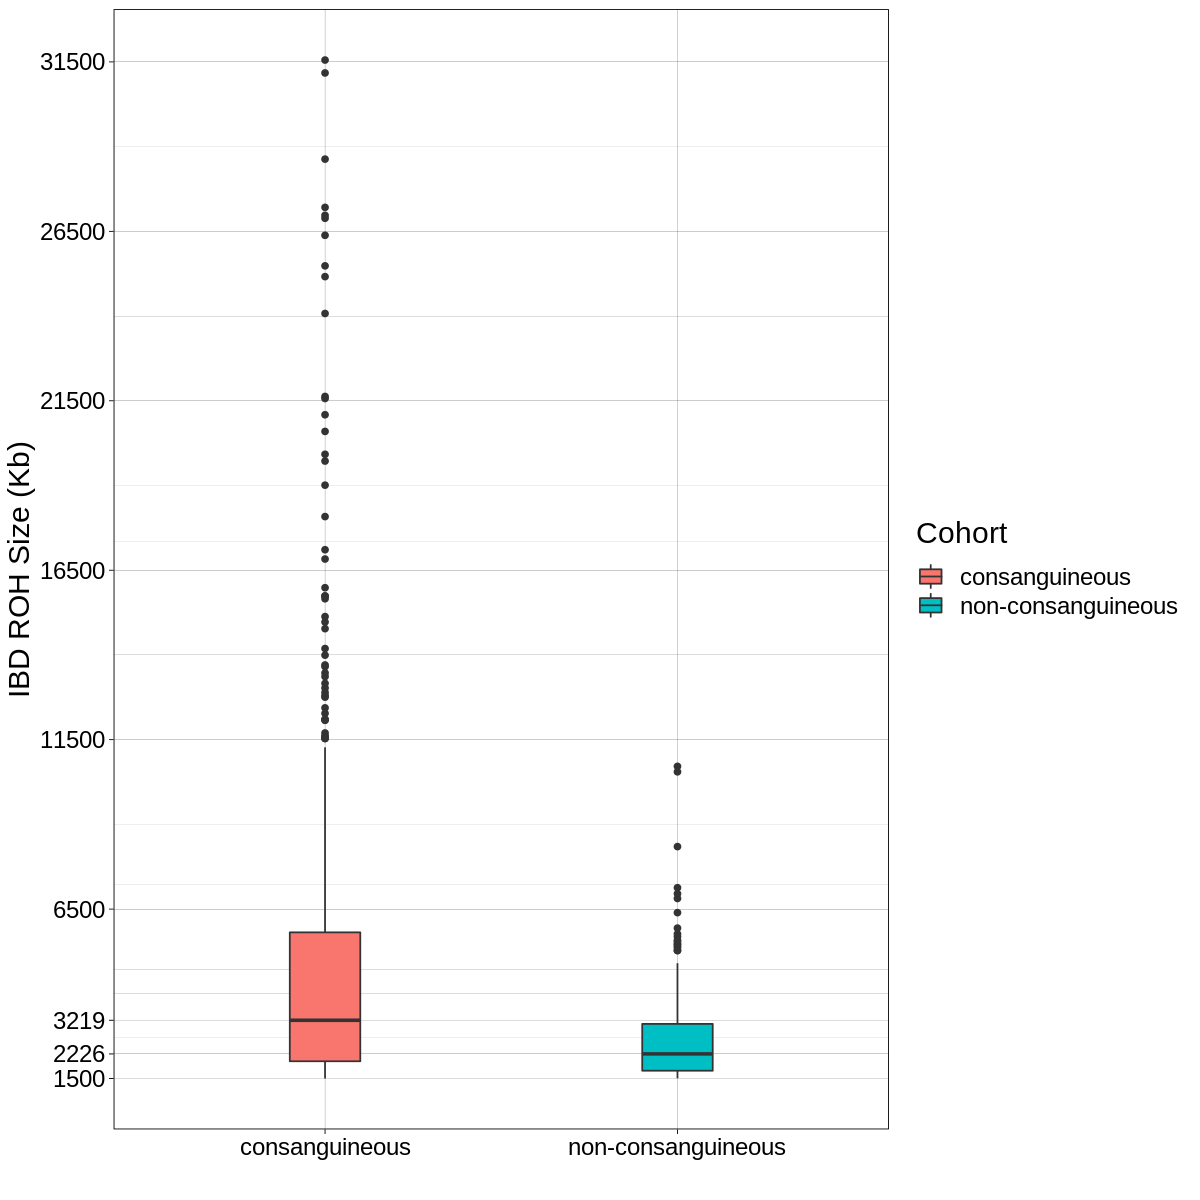

In [97]:
options(repr.plot.width=10, repr.plot.height=10)
ggplot(AudacityROHResult_1.5Mb, aes(x=Status,y=Length/1000, fill=Status)) +  geom_boxplot(width=0.2) +
xlab("") +
ylab("IBD ROH Size (Kb)") +
labs(fill = "Cohort") +
theme_linedraw() +
theme(text=element_text(size=18,color = "black")) + 
scale_y_continuous(breaks= c(seq(1500,35000, by=5000),3219,2226))


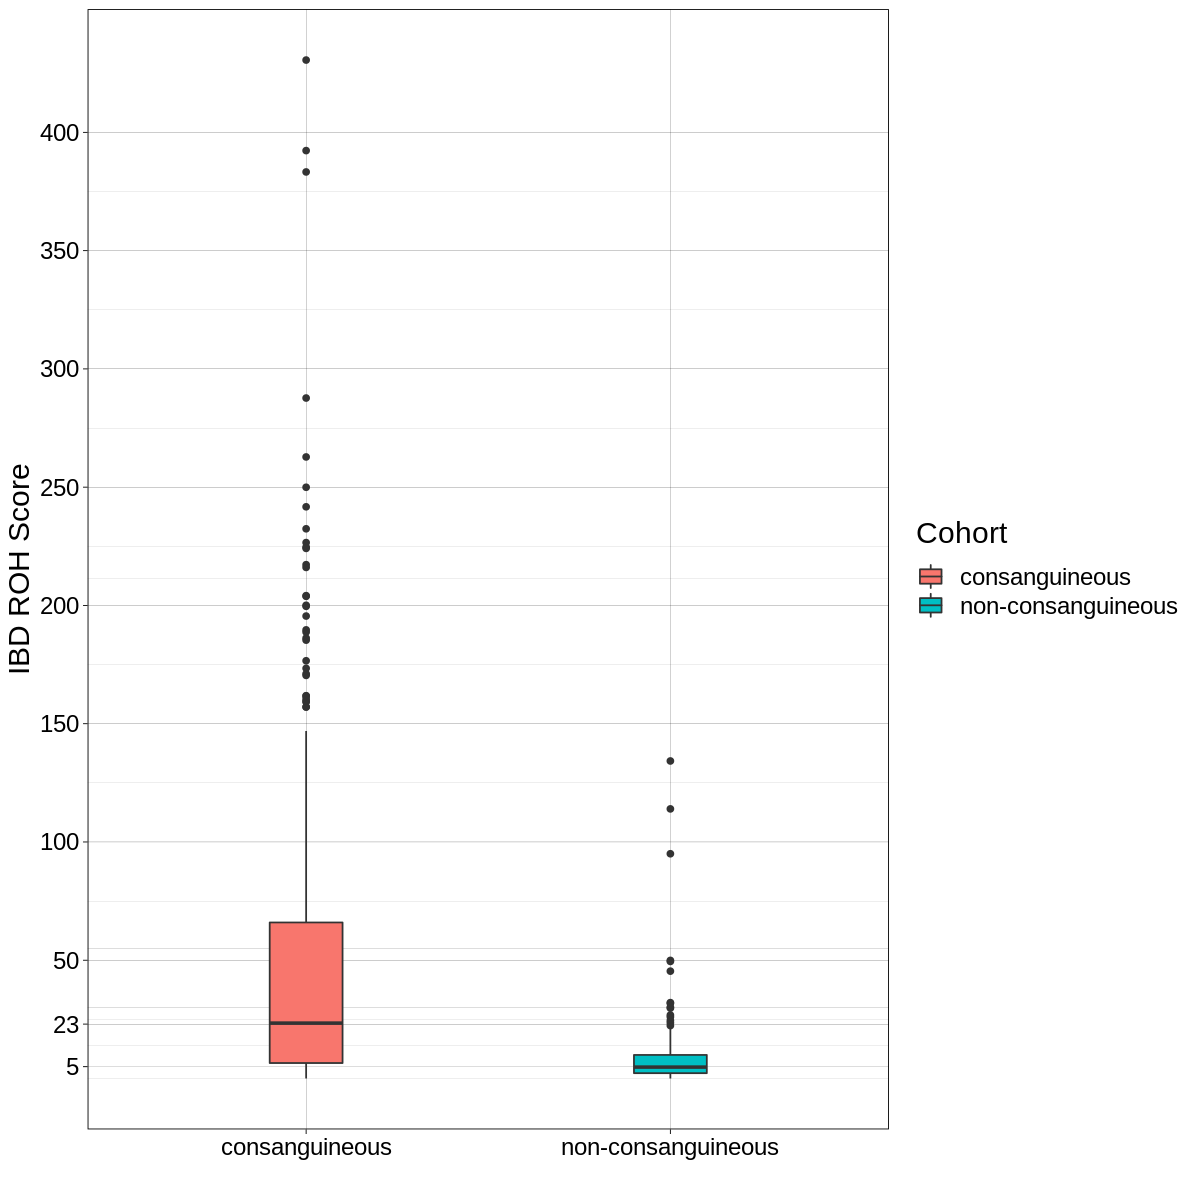

In [96]:
options(repr.plot.width=10, repr.plot.height=10)
ggplot(AudacityROHResult_1.5Mb, aes(x=Status,y=Score, fill=Status)) +  geom_boxplot(width=0.2) +
xlab("") +
ylab("IBD ROH Score") +
labs(fill = "Cohort") +
theme_linedraw() +
theme(text=element_text(size=18,color = "black")) + 
scale_y_continuous(breaks= c(seq(50,400, by=50),23,5))

In [31]:
ROHSummaryPerID<- AudacityROHResult_1.5Mb %>% 
  group_by(ID,  Status) %>% 
  summarize(ScoreROH=sum(Score),sROH=sum(Length),nROH=n())

ROHSummaryPerID

`summarise()` has grouped output by 'ID'. You can override using the `.groups` argument.



ID,Status,ScoreROH,sROH,nROH
<fct>,<fct>,<dbl>,<int>,<int>
I01,consanguineous,959.7029,115173982,36
I02,consanguineous,1277.3736,176948904,40
I03,consanguineous,3267.9328,242769024,38
I04,consanguineous,1744.6342,206046124,40
I05,consanguineous,2945.2749,341612047,63
I06,consanguineous,2782.9252,288095117,66
I07,consanguineous,2007.9762,244375629,51
I08,consanguineous,2328.1807,306723454,60
I09,consanguineous,725.1928,106509219,23


##### ***Distribution of total ROH lengths over all individuals in each of the 2 cohorts (ROH class > 1.5Mb)***




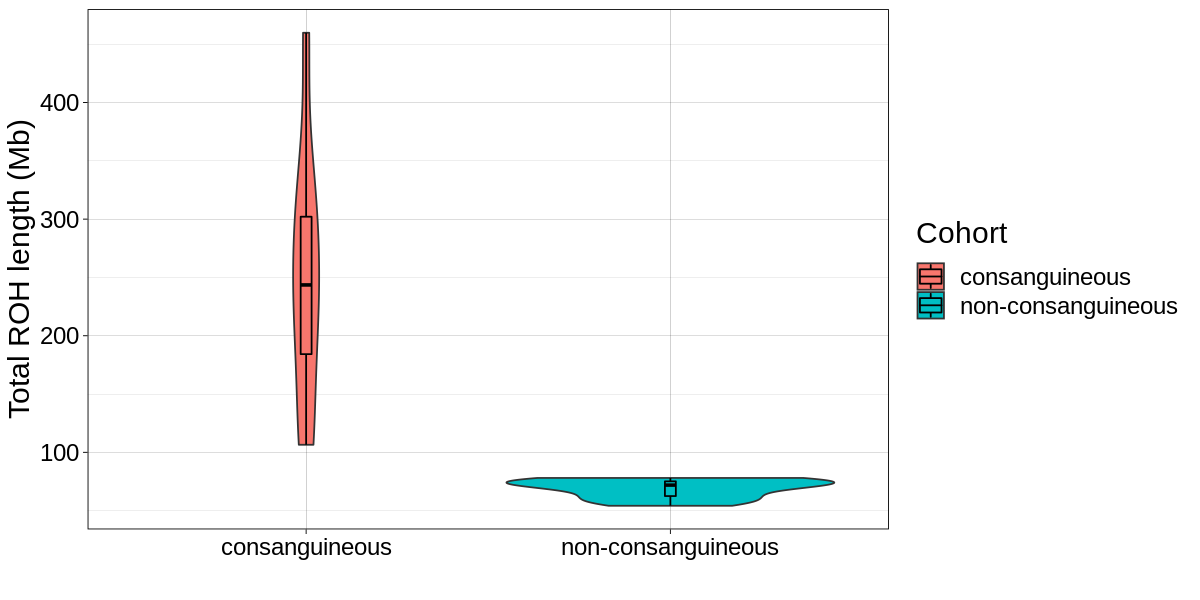

In [95]:
options(repr.plot.width=10, repr.plot.height=5)
ggplot(ROHSummaryPerID, aes(x=Status,y=sROH/1000000, fill=Status)) + geom_violin(trim = T) +
xlab("") +
ylab("Total ROH length (Mb)") +
labs(fill = "Cohort") +
theme_linedraw() +
geom_boxplot(width=0.03,color="black") +
theme(text=element_text(size=18,color = "black"))

##### ***Distribution of total number of ROH over all individuals in each of the 2 cohorts (ROH class > 1.5Mb)***


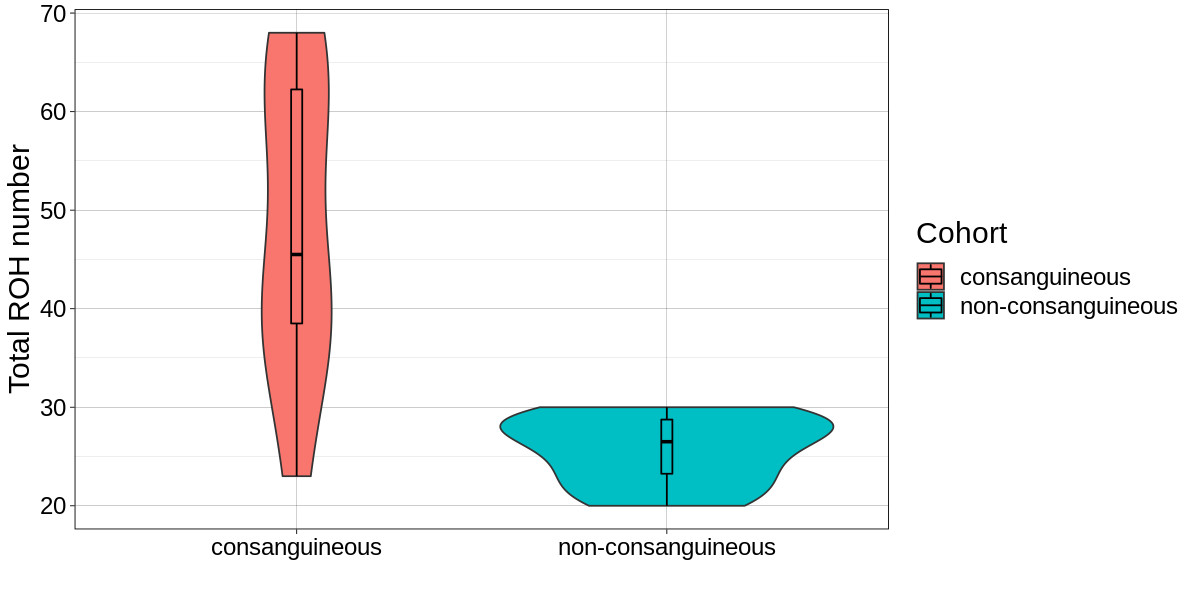

In [94]:
options(repr.plot.width=10, repr.plot.height=5)
ggplot(ROHSummaryPerID, aes(x=Status,y=nROH, fill=Status)) + geom_violin(trim = T) +
xlab("") +
ylab("Total ROH number") +
labs(fill = "Cohort") +
theme_linedraw() +
geom_boxplot(width=0.03,color="black") +
theme(text=element_text(size=18,color = "black"))

##### ***Distribution of total ROH score over all individuals in each of the 2 cohorts (ROH class > 1.5Mb)***

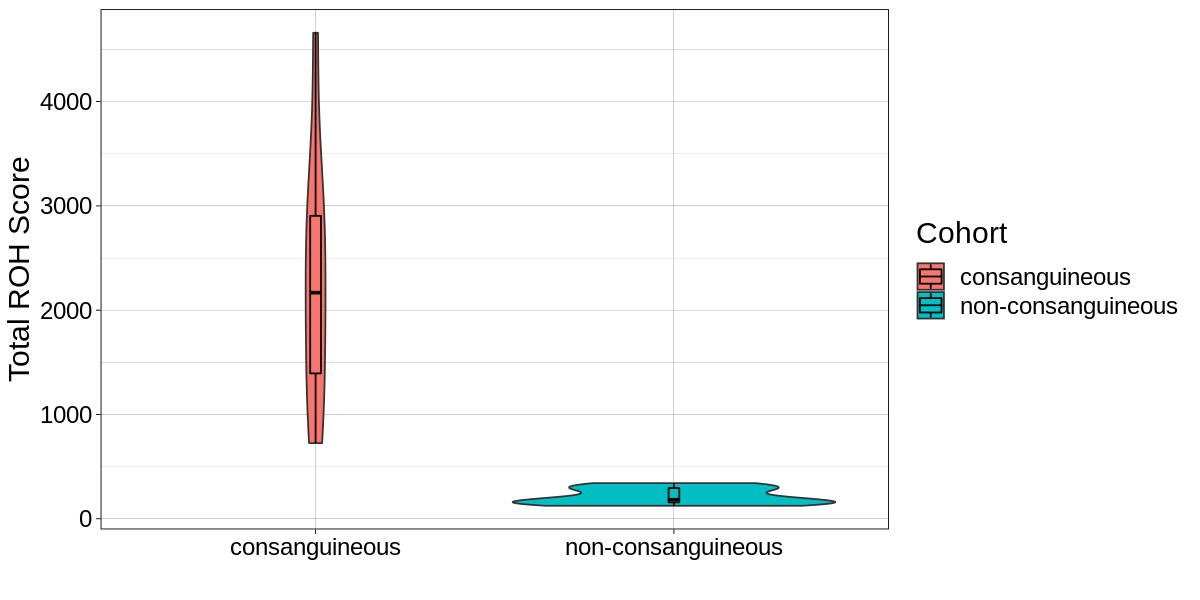

In [93]:
options(repr.plot.width=10, repr.plot.height=5)
ggplot(ROHSummaryPerID, aes(x=Status,y=ScoreROH, fill=Status)) + geom_violin(trim = T) +
xlab("") +
ylab("Total ROH Score") +
labs(fill = "Cohort") +
theme_linedraw() +
geom_boxplot(width=0.03,color="black") +
theme(text=element_text(size=18,color = "black"))

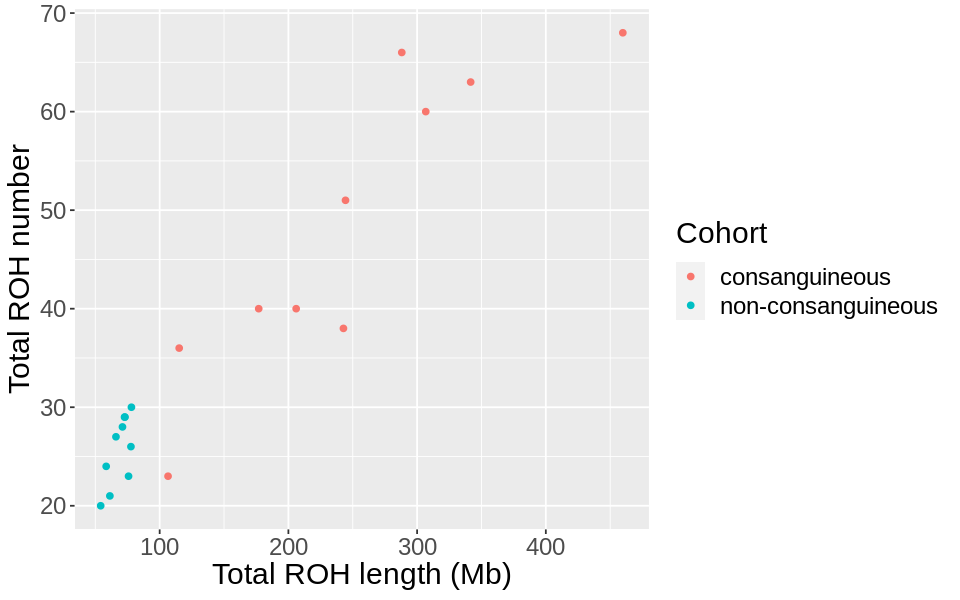

In [92]:
options(repr.plot.width=8, repr.plot.height=5)
ggplot(ROHSummaryPerID, aes(x = sROH/1000000, y = nROH)) + geom_point(aes(colour = factor(Status))) +
theme(text=element_text(size=18,color = "black"))+
xlab("Total ROH length (Mb)") +
ylab("Total ROH number")+
labs(colour = "Cohort")